C:\Users\Swift 3\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Swift 3\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Swift 3\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


9.666666666666666


C:\Users\Swift 3\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


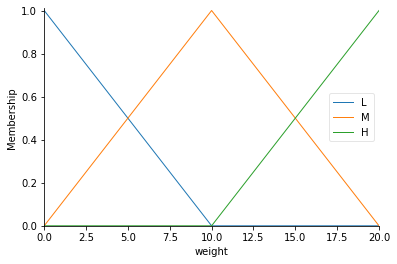

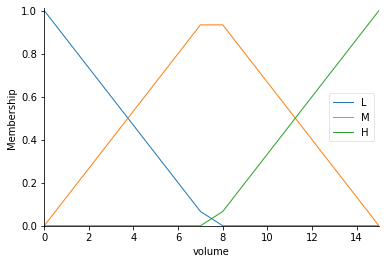

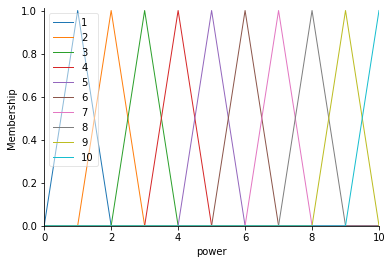

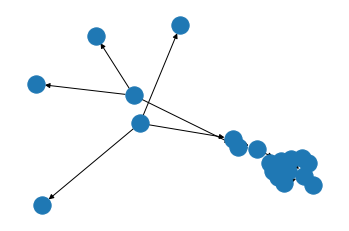

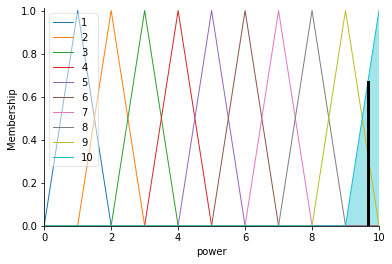

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
w = ctrl.Antecedent(np.arange(0, 21, 1), 'weight') #น้้ำหนักรับรอง
v = ctrl.Antecedent(np.arange(0, 16, 1), 'volume') #ปริมาณของผ้า
pw = ctrl.Consequent(np.arange(0, 11, 1), 'power') #ระดับเครื่องซักผ้า

# Auto-membership function population is possible with .automf(3, 5, or 7)
#x.automf(3)
#y.automf(3)

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
w['L'] = fuzz.trimf(w.universe, [0, 0, 10])
w['M'] = fuzz.trimf(w.universe, [0, 10, 20])
w['H'] = fuzz.trimf(w.universe, [10, 20, 20])
v['L'] = fuzz.trimf(v.universe, [0, 0, 7.5])
v['M'] = fuzz.trimf(v.universe, [0, 7.5, 15])
v['H'] = fuzz.trimf(v.universe, [7.5, 15, 15])
pw['1'] = fuzz.trimf(pw.universe, [0, 1, 2])
pw['2'] = fuzz.trimf(pw.universe, [1, 2, 3])
pw['3'] = fuzz.trimf(pw.universe, [2, 3, 4])
pw['4'] = fuzz.trimf(pw.universe, [3, 4, 5])
pw['5'] = fuzz.trimf(pw.universe, [4, 5, 6])
pw['6'] = fuzz.trimf(pw.universe, [5, 6, 7])
pw['7'] = fuzz.trimf(pw.universe, [6, 7, 8])
pw['8'] = fuzz.trimf(pw.universe, [7, 8, 9])
pw['9'] = fuzz.trimf(pw.universe, [8, 9, 10])
pw['10'] = fuzz.trimf(pw.universe,[9, 10, 10])
# You can see how these look with .view()
w.view()
v.view()
pw.view()
#กฎหลักๆมี 5 กฎ
rule1 = ctrl.Rule(w['L'] & v['L'], pw['1'])#ถ้าน้ำหนักน้อยและผ้าน้อย ให้ระดับ 1
rule2 = ctrl.Rule(w['M'] & v['M'], pw['5'])#ถ้าน้ำหนักปานกลางและผ้าเปานกลาง ให้ระดับ 5
rule3 = ctrl.Rule(w['H'] & v['H'], pw['10'])#ถ้าน้ำหนักเยอะและผ้าเยอะ ให้ระดับ 10
rule4 = ctrl.Rule(w['L'] & v['H'], pw['5'])#ถ้าน้ำหนักน้อยและผ้าเยอะ ให้ระดับ 5
rule5 = ctrl.Rule(w['H'] & v['L'], pw['5'])#ถ้าน้ำหนักเยอะและผ้าน้อย ให้ระดับ 5
rule1.view()
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['weight'] = 20
tipping.input['volume'] = 15

# Crunch the numbers
tipping.compute()
print(tipping.output['power'])
pw.view(sim=tipping)